<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      300 non-null    object 
 1   state        300 non-null    object 
 2   city         300 non-null    object 
 3   station      300 non-null    object 
 4   latitude     300 non-null    float64
 5   longitude    300 non-null    float64
 6   last_update  300 non-null    object 
 7   CO           300 non-null    float64
 8   NH3          300 non-null    float64
 9   NO2          300 non-null    float64
 10  OZONE        300 non-null    float64
 11  PM10         300 non-null    float64
 12  PM2.5        300 non-null    float64
 13  SO2          300 non-null    float64
dtypes: float64(9), object(5)
memory usage: 32.9+ KB
None
         latitude   longitude          CO         NH3         NO2       OZONE  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mea

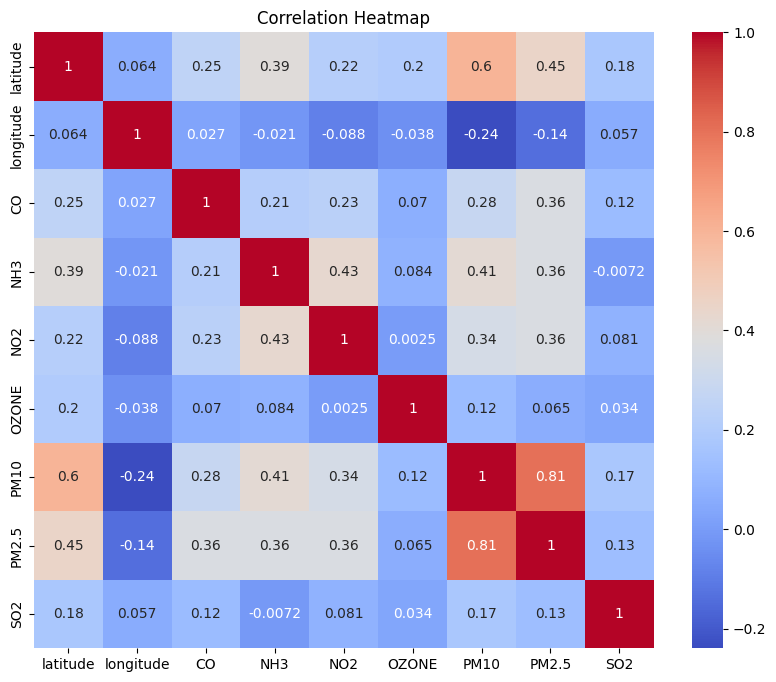

Could not parse 'last_update': 'Column not found: pollutant_avg'


C:\Users\amsri\AppData\Local\Temp\ipykernel_3952\2620942078.py:43: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index("Date").resample("M")["pollutant_avg"].mean().plot(figsize=(12, 6))


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.rcParams["axes.unicode_minus"] = False

df = pd.read_csv("../data/processed/cleaned_AQI.csv")

print(df.info())
print(df.describe())
print(df.head())

print("\nMissing values per column:")
print(df.isnull().sum())

numeric_df = df.select_dtypes(include=['float64', 'int64'])
print("\nNumeric columns for correlation:", numeric_df.columns.tolist())

corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

pollutants = ["pollutant_min", "pollutant_max", "pollutant_avg"]

for pollutant in pollutants:
    if pollutant in numeric_df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[pollutant].dropna(), kde=True, bins=30)
        plt.title(f"Distribution of {pollutant}")
        plt.show()

if "last_update" in df.columns:
    try:
        df["Date"] = pd.to_datetime(df["last_update"])
        if "pollutant_avg" in df.columns:
            df.set_index("Date").resample("ME")["pollutant_avg"].mean().plot(figsize=(12, 6))
            plt.title("Monthly Average Pollutant Average")
            plt.ylabel("pollutant_avg")
            plt.show()
        else:
            print("Column 'pollutant_avg' not found for time series plot.")
    except Exception as e:
        print(f"Could not parse 'last_update': {e}")


